In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
#uploading data
data = pd.read_csv('food_delivery.csv')
data.head(10)
#data.shape

,user_code,date,company,restaurant,price_paid,delivery_charge,packing_charge,district,state,zone
0,227,01-01-2019,alpha,Burger Spot,125.0,0.0,10.0,Ernakulam,KERALA,SOUTH
1,297,01-01-2019,alpha,Cafe Coffee Day,192.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH
2,297,01-01-2019,alpha,Malini's Health Kitchen,65.0,0.0,0.0,Bangalore,KARNATAKA,SOUTH
3,394,01-01-2019,alpha,The Bowl Company,292.0,0.0,19.0,Bangalore,KARNATAKA,SOUTH
4,420,01-01-2019,alpha,Podi Idly,101.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH
5,420,01-01-2019,alpha,Kataria's Home Food,128.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH
6,435,01-01-2019,alpha,Salem RR Briyani Unvagam,186.0,20.0,0.0,Kanchipuram,TAMIL NADU,SOUTH
7,541,01-01-2019,alpha,Scoops,120.0,0.0,0.0,K.V.Rangareddy,ANDHRA PRADESH,SOUTH
8,541,01-01-2019,alpha,Raju Gari Pulao,619.0,0.0,20.0,K.V.Rangareddy,ANDHRA PRADESH,SOUTH
9,590,01-01-2019,alpha,Loiee Sweets & Snacks,73.0,0.0,0.0,Kanchipuram,TAMIL NADU,SOUTH


In [3]:
#date to day
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['day'] = data['date'].dt.weekday_name
data.head()

,user_code,date,company,restaurant,price_paid,delivery_charge,packing_charge,district,state,zone,day
0,227,2019-01-01,alpha,Burger Spot,125.0,0.0,10.0,Ernakulam,KERALA,SOUTH,Tuesday
1,297,2019-01-01,alpha,Cafe Coffee Day,192.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday
2,297,2019-01-01,alpha,Malini's Health Kitchen,65.0,0.0,0.0,Bangalore,KARNATAKA,SOUTH,Tuesday
3,394,2019-01-01,alpha,The Bowl Company,292.0,0.0,19.0,Bangalore,KARNATAKA,SOUTH,Tuesday
4,420,2019-01-01,alpha,Podi Idly,101.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday


In [4]:
#testing null values
data.isnull().sum()

user_code          0
date               0
company            0
restaurant         0
price_paid         0
delivery_charge    0
packing_charge     0
district           0
state              0
zone               0
day                0
dtype: int64

In [5]:
#colums name
data.columns

Index(['user_code', 'date', 'company', 'restaurant', 'price_paid',
       'delivery_charge', 'packing_charge', 'district', 'state', 'zone',
       'day'],
      dtype='object')

In [6]:
#check names of totols companies
data['company'].unique()

array(['alpha', 'beta', 'gamma'], dtype=object)

In [7]:
#describe delivery charge 
data['delivery_charge'].describe()

count    34576.000000
mean         4.229096
std          9.049135
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: delivery_charge, dtype: float64

In [8]:
#totol number of restorents
data['restaurant'].unique().shape

(11150,)

In [9]:
#discribe all data
data.describe()

,user_code,price_paid,delivery_charge,packing_charge
count,34576.000000,34576.000000,34576.000000,34576.000000
mean,37080.601255,181.340701,4.229096,3.039987
std,28273.252080,183.469593,9.049135,8.202225
min,51.000000,0.300000,0.000000,0.000000
25%,8352.000000,88.000000,0.000000,0.000000
50%,36125.000000,125.000000,0.000000,0.000000
75%,68693.000000,207.400000,0.000000,0.000000
max,80418.000000,4168.000000,100.000000,372.150000


In [10]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34576 entries, 0 to 34575
Data columns (total 11 columns):
user_code          34576 non-null int64
date               34576 non-null datetime64[ns]
company            34576 non-null object
restaurant         34576 non-null object
price_paid         34576 non-null float64
delivery_charge    34576 non-null float64
packing_charge     34576 non-null float64
district           34576 non-null object
state              34576 non-null object
zone               34576 non-null object
day                34576 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 2.9+ MB


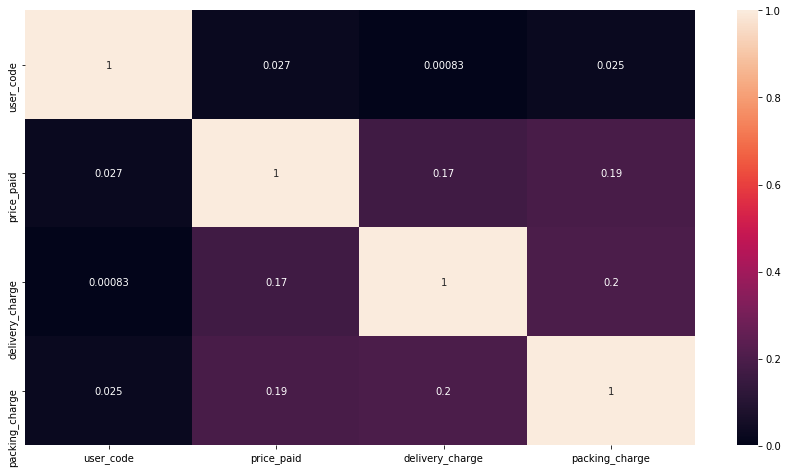

In [11]:
#correlation matrix
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Day wise Order')

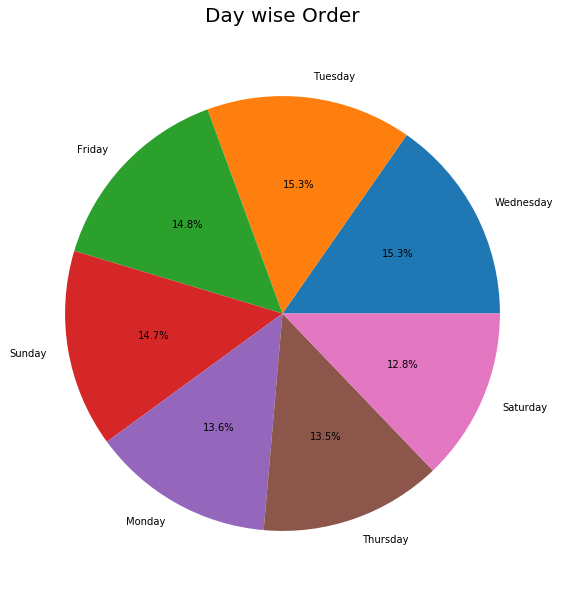

In [12]:
plt.figure(figsize=(10,10))
chains=data['day'].value_counts()
plt.pie(x=chains,labels=chains.index,autopct='%1.1f%%')
plt.title("Day wise Order",size=20,pad=20) 

Text(0.5, 0, 'del_charge')

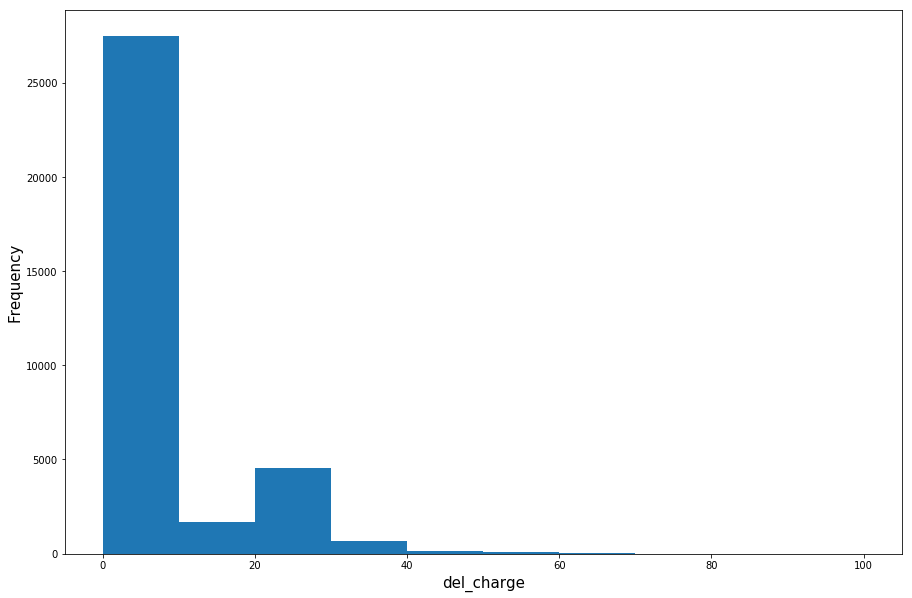

In [13]:
plt.figure(figsize=(15,10))
plt.hist(data['delivery_charge'])
plt.ylabel('Frequency',fontsize = 15)
plt.xlabel('del_charge',fontsize = 15)

Text(0.5, 0, 'packing_charge')

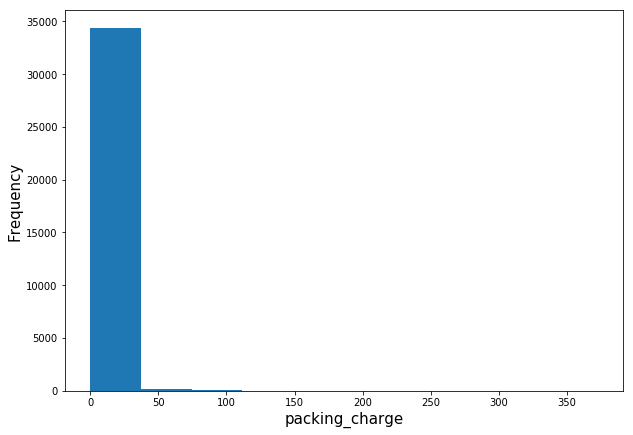

In [14]:
plt.figure(figsize=(10,7))
plt.hist(data['packing_charge'])
plt.ylabel('Frequency',fontsize = 15)
plt.xlabel('packing_charge',fontsize = 15)

Text(0.5, 0, 'pricee')

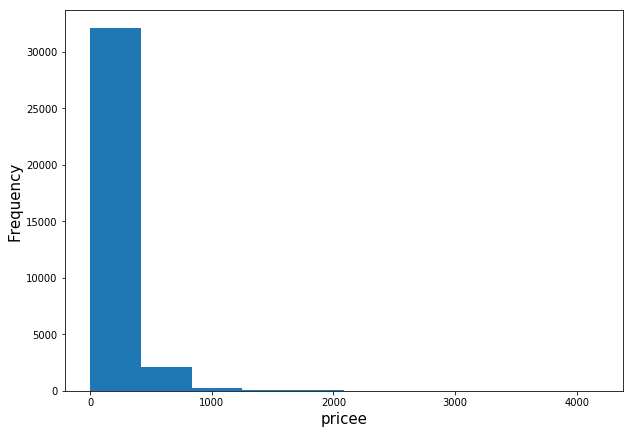

In [15]:
plt.figure(figsize=(10,7))
plt.hist(data['price_paid'])
plt.ylabel('Frequency',fontsize = 15)
plt.xlabel('pricee',fontsize = 15)

Text(0.5, 1.0, 'Top 50 users ')

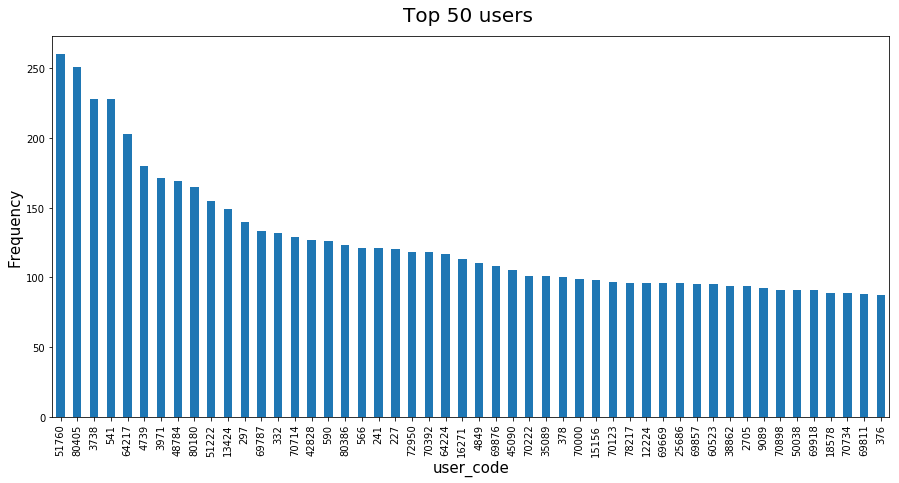

In [16]:
plt.figure(figsize=(15,7))
data['user_code'].value_counts()[ :50].plot.bar()
plt.xlabel('user_code', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Top 50 users ',size=20,pad=15)

Text(0.5, 0, 'Number of outlets')

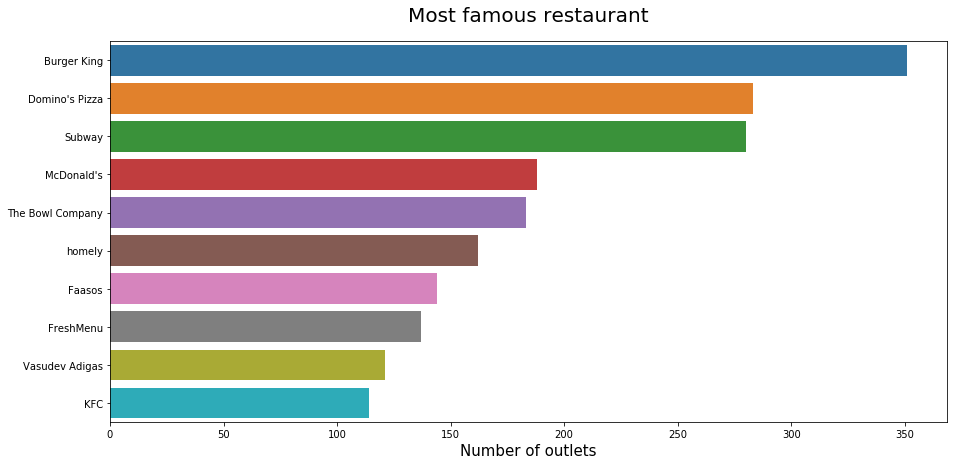

In [17]:
plt.figure(figsize=(15,7))
chains=data['restaurant'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous restaurant",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 0, 'Number of orders')

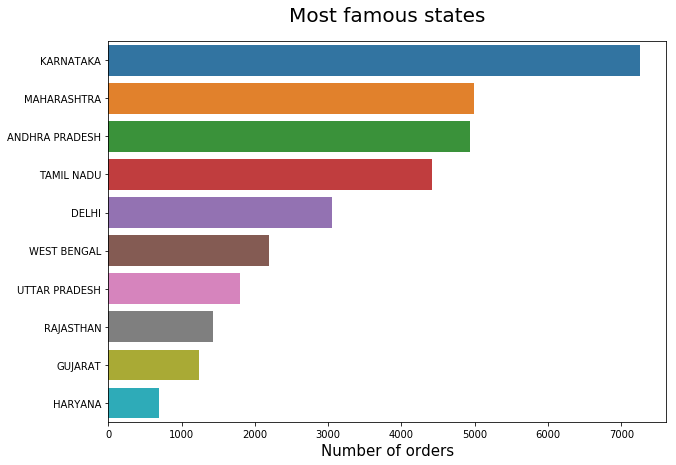

In [18]:
plt.figure(figsize=(10,7))
chains=data['state'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous states",size=20,pad=20)
plt.xlabel("Number of orders",size=15)

Text(0.5, 0, 'Number of Oreders')

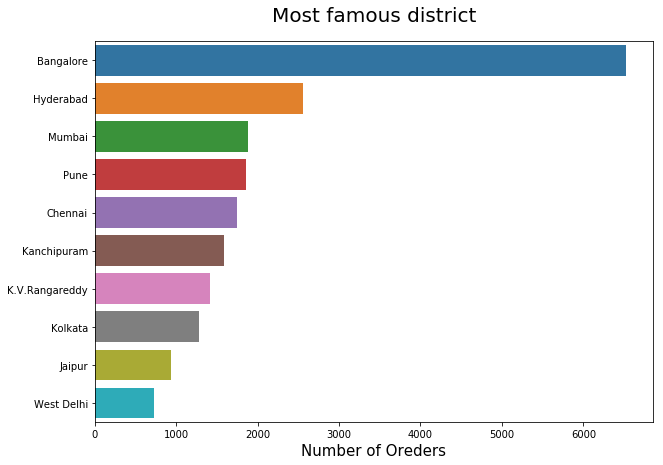

In [19]:
plt.figure(figsize=(10,7))
chains=data['district'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous district",size=20,pad=20)
plt.xlabel("Number of Oreders",size=15)

Text(0, 0.5, 'Percentage of restaurants')

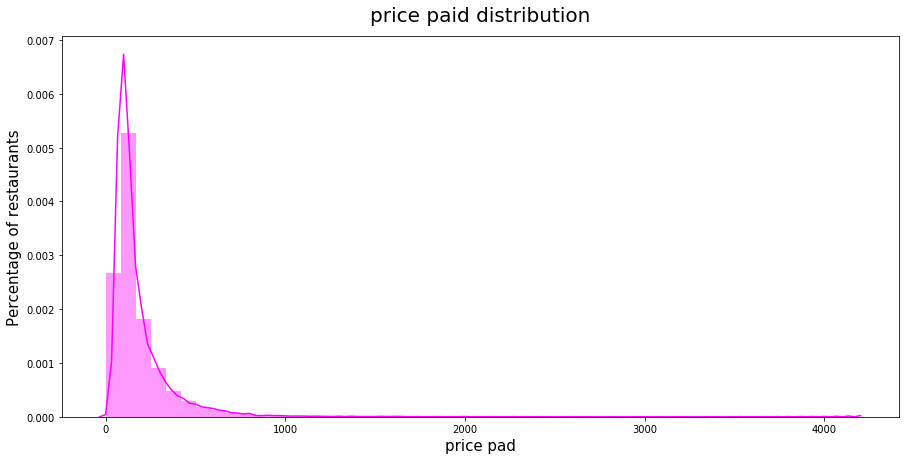

In [20]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(data['price_paid'],color="magenta")
ax.set_title('price paid distribution',size=20,pad=15)
plt.xlabel('price pad',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

Text(0.5, 0, 'Number of outlets')

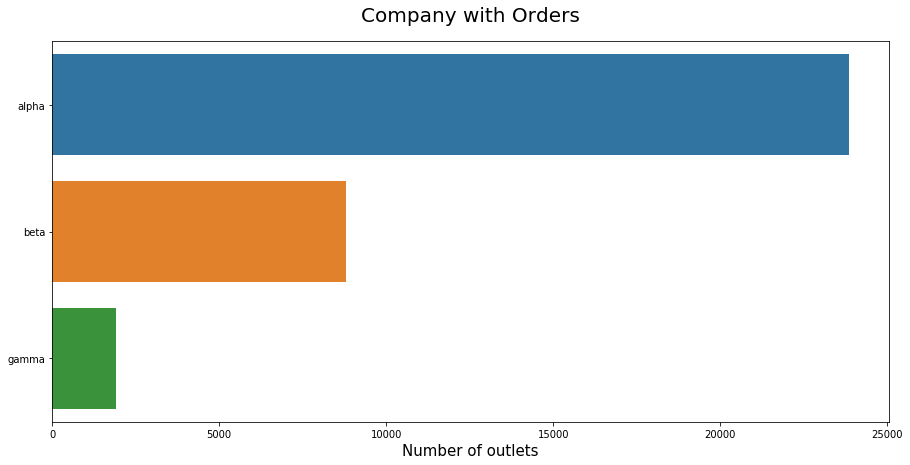

In [21]:
plt.figure(figsize=(15,7))
chains=data['company'].value_counts()
sns.barplot(x=chains,y=chains.index)
plt.title("Company with Orders",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 1.0, 'zone with Order')

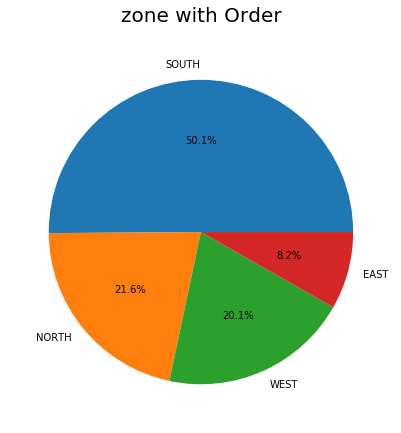

In [22]:
plt.figure(figsize=(10,7))
chains=data['zone'].value_counts()
plt.pie(x=chains,labels=chains.index,autopct='%1.1f%%')
plt.title("zone with Order",size=20,pad=20)

In [23]:
#analising any specific company(as alpha)
Alpha= data[data['company']=='alpha']
Alpha.head()
#Alpha.shape

,user_code,date,company,restaurant,price_paid,delivery_charge,packing_charge,district,state,zone,day
0,227,2019-01-01,alpha,Burger Spot,125.0,0.0,10.0,Ernakulam,KERALA,SOUTH,Tuesday
1,297,2019-01-01,alpha,Cafe Coffee Day,192.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday
2,297,2019-01-01,alpha,Malini's Health Kitchen,65.0,0.0,0.0,Bangalore,KARNATAKA,SOUTH,Tuesday
3,394,2019-01-01,alpha,The Bowl Company,292.0,0.0,19.0,Bangalore,KARNATAKA,SOUTH,Tuesday
4,420,2019-01-01,alpha,Podi Idly,101.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday


Text(0.5, 0, 'Number of orders of alpha')

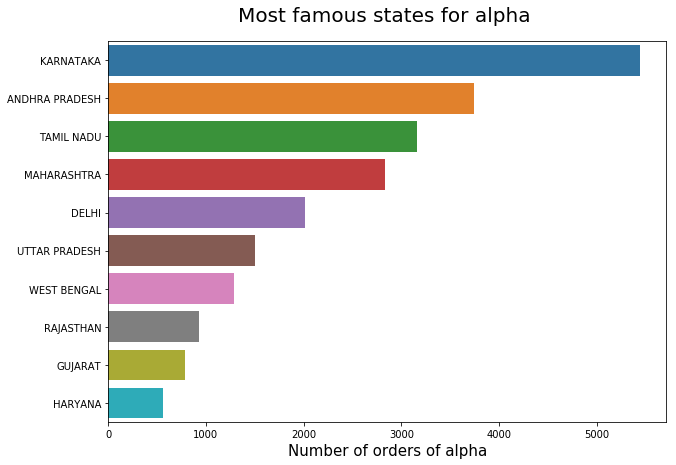

In [24]:
plt.figure(figsize=(10,7))
chains=Alpha['state'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous states for alpha ",size=20,pad=20)
plt.xlabel("Number of orders of alpha",size=15)

Text(0.5, 0, 'Number of orders of alpha')

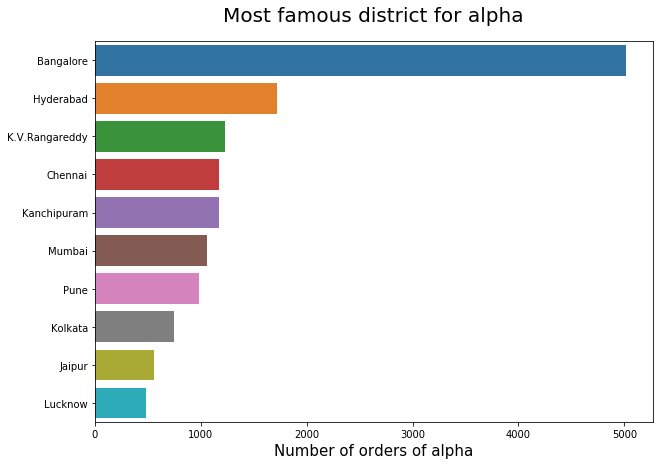

In [25]:
plt.figure(figsize=(10,7))
chains=Alpha['district'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous district for alpha",size=20,pad=20)
plt.xlabel("Number of orders of alpha",size=15)

Text(0.5, 1.0, 'Day with Orde of alpha')

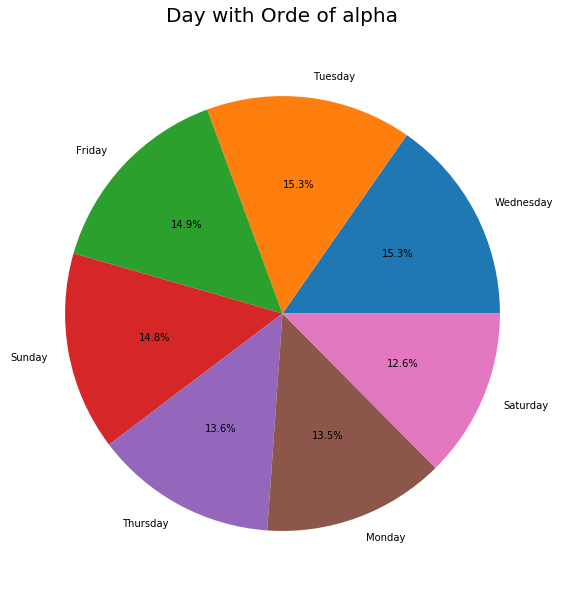

In [26]:
plt.figure(figsize=(10,10))
chains=Alpha['day'].value_counts()
plt.pie(x=chains,labels=chains.index,autopct='%1.1f%%')
plt.title("Day with Orde of alpha",size=20,pad=20)

In [27]:
#analising any specific restaurent(as Burger King)
BK = data[data['restaurant']=='Burger King']
BK.head()

,user_code,date,company,restaurant,price_paid,delivery_charge,packing_charge,district,state,zone,day
14,2518,2019-01-01,alpha,Burger King,108.0,0.0,29.0,Mumbai,MAHARASHTRA,WEST,Tuesday
276,27730,2019-02-01,alpha,Burger King,73.0,0.0,0.0,West Delhi,DELHI,NORTH,Friday
285,35201,2019-02-01,alpha,Burger King,182.0,0.0,0.0,Mumbai,MAHARASHTRA,WEST,Friday
384,25686,2019-03-01,alpha,Burger King,107.0,0.0,29.0,Hyderabad,ANDHRA PRADESH,SOUTH,Friday
389,37081,2019-03-01,alpha,Burger King,313.0,0.0,29.0,Mumbai,MAHARASHTRA,WEST,Friday


In [28]:
BK.describe()

,user_code,price_paid,delivery_charge,packing_charge
count,351.000000,351.000000,351.000000,351.000000
mean,41917.062678,208.040969,3.108262,16.441595
std,27192.883403,175.080710,7.996407,14.389932
min,60.000000,51.000000,0.000000,0.000000
25%,18102.500000,114.680000,0.000000,0.000000
50%,42828.000000,162.000000,0.000000,29.000000
75%,69972.500000,243.000000,0.000000,29.000000
max,80405.000000,1964.000000,40.000000,29.000000


Text(0.5, 0, 'Number of orders of Burger King')

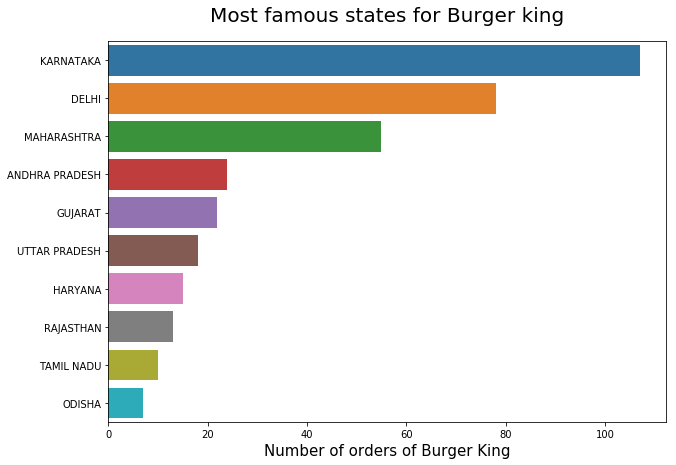

In [29]:
plt.figure(figsize=(10,7))
chains=BK['state'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous states for Burger king",size=20,pad=20)
plt.xlabel("Number of orders of Burger King",size=15)

Text(0.5, 0, 'Number of orders of Burger King')

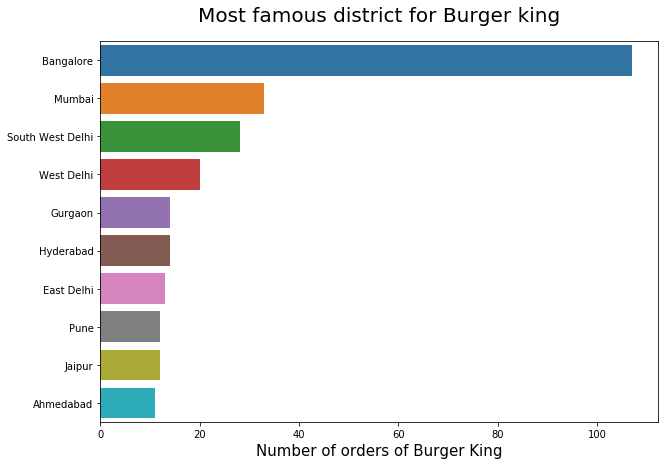

In [30]:
plt.figure(figsize=(10,7))
chains=BK['district'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous district for Burger king",size=20,pad=20)
plt.xlabel("Number of orders of Burger King",size=15)

Text(0.5, 1.0, 'Day with Orde of Burger King')

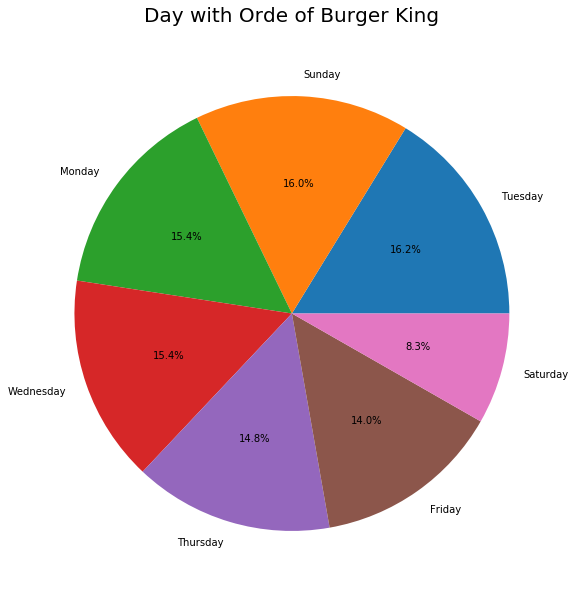

In [31]:
plt.figure(figsize=(10,10))
chains=BK['day'].value_counts()
plt.pie(x=chains,labels=chains.index,autopct='%1.1f%%')
plt.title("Day with Orde of Burger King",size=20,pad=20)

In [32]:
#analising any specific district(as Bangalore)
Bang= data[data['district']=='Bangalore']
Bang.head()
#Bang.shape

,user_code,date,company,restaurant,price_paid,delivery_charge,packing_charge,district,state,zone,day
1,297,2019-01-01,alpha,Cafe Coffee Day,192.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday
2,297,2019-01-01,alpha,Malini's Health Kitchen,65.0,0.0,0.0,Bangalore,KARNATAKA,SOUTH,Tuesday
3,394,2019-01-01,alpha,The Bowl Company,292.0,0.0,19.0,Bangalore,KARNATAKA,SOUTH,Tuesday
4,420,2019-01-01,alpha,Podi Idly,101.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday
5,420,2019-01-01,alpha,Kataria's Home Food,128.0,0.0,10.0,Bangalore,KARNATAKA,SOUTH,Tuesday


Text(0.5, 1.0, 'Top 20 users in Bangalore')

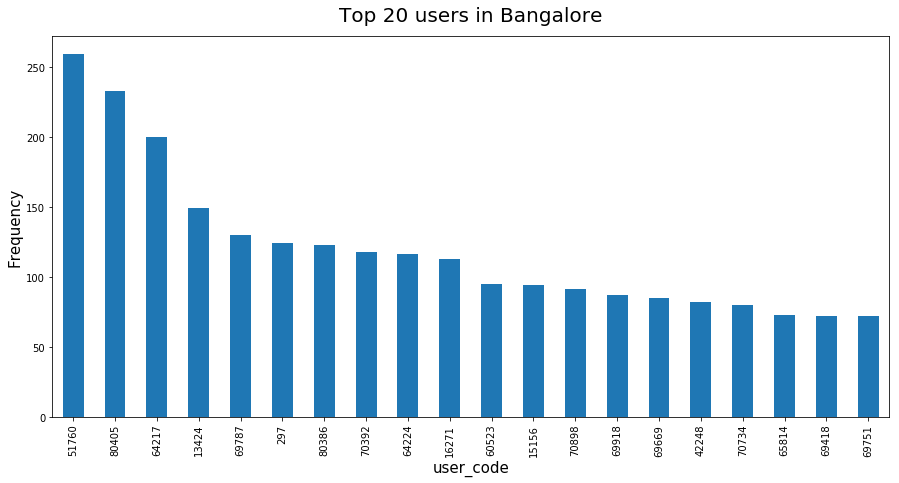

In [33]:
plt.figure(figsize=(15,7))
Bang['user_code'].value_counts()[ :20].plot.bar()
plt.xlabel('user_code', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Top 20 users in Bangalore',size=20,pad=15)

Text(0.5, 0, 'Number of orders')

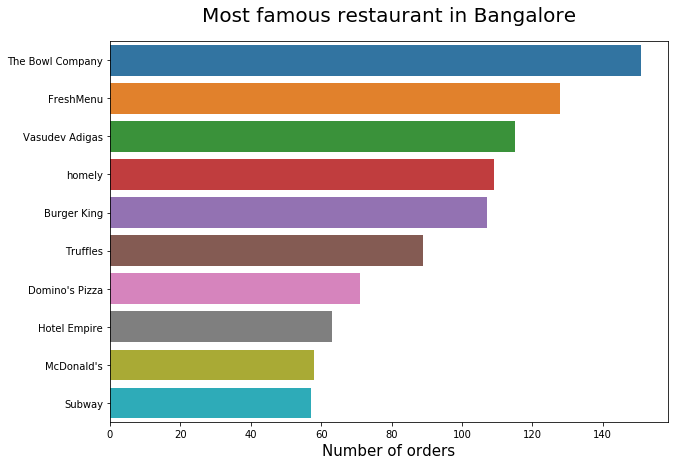

In [34]:
plt.figure(figsize=(10,7))
chains=Bang['restaurant'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous restaurant in Bangalore",size=20,pad=20)
plt.xlabel("Number of orders",size=15)

Text(0.5, 1.0, 'Day with Orders in Bangalore')

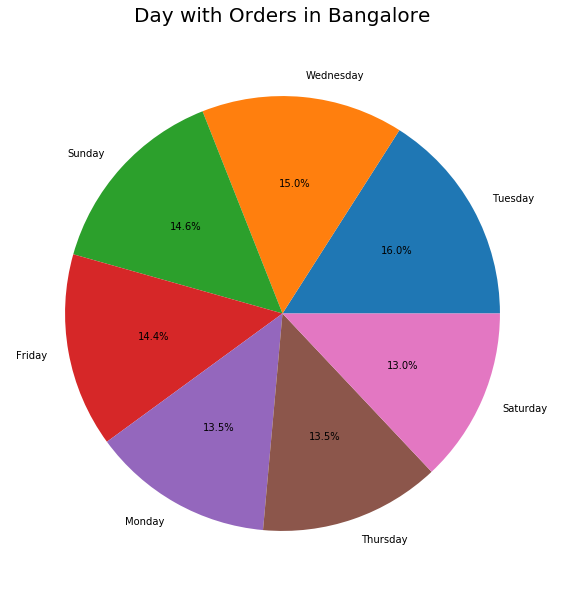

In [35]:
plt.figure(figsize=(10,10))
chains=Bang['day'].value_counts()
plt.pie(x=chains,labels=chains.index,autopct='%1.1f%%')
plt.title("Day with Orders in Bangalore",size=20,pad=20)